#### Opis spremenljivk podatkovne zbirke:

- date: datum izposoje
- rented_bike_count: število izposoj koles
- hour - ura
- temperature: temperatura v stopinjah celzija
- humidity: vlažnost zraka izražena v odstotkih
- windspeed: hitrost vetra izražena v m/s
- visibility: vidnost (10m)
- dew_point_temperature - rosišče v stopinjah celzija
- solar_radiation: sončno sevanje izraženo v MJ/m2
- rainfall: padavine izražene v mm
- snowfall: sneženje izraženo v cm
- seasons: letni časi izraženi s kategorijami: winter, spring, summer, autumn
- holiday: prazniki izraženi s kategorijama: Holiday/No holiday
- work_hours: čas delovnika izražen s kategorijama: Yes/No

In [1]:
import pandas as pd

df = pd.read_csv('data/bike_data.csv')
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,work_hours
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


 Izpis števila vrstic, ki ima manjkajoče podatke, za vsak stolpec (spremenljivko).

In [2]:
df.isnull().sum()

date                      0
rented_bike_count         0
hour                      0
temperature               0
humidity                  0
wind_speed                0
visibility                0
dew_point_temperature    86
solar_radiation           0
rainfall                  0
snowfall                  0
seasons                   0
holiday                   0
work_hours                0
dtype: int64

Zapolnitev morebitnih manjkajočih številskih podatkov s povprečjem tega stolpca.

In [3]:
df['dew_point_temperature'].fillna(df['dew_point_temperature'].mean(), inplace=True)

Pretvorba stolpca "date" v tri nove stolpce: "day", "month" in "year". Vrednosti stolpca "date" so zapisane v obliki dan/mesec/leto). Po pretvorbi naj se stolpec "date" izbriše.

In [4]:
df['day'] = pd.DatetimeIndex(df['date'], dayfirst=True).day
df['month'] = pd.DatetimeIndex(df['date'], dayfirst=True).month
df['year'] = pd.DatetimeIndex(df['date'], dayfirst=True).year
df.drop('date', axis=1, inplace=True)
df.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,work_hours,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


Preoblikovanje (kodiranje) stolpcev, ki vsebujejo kategorične vrednosti.

In [5]:
df = pd.get_dummies(df, columns=['seasons', 'holiday', 'work_hours'])
df.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,...,month,year,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,work_hours_No,work_hours_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1


Izpis opisne statistike celotne podatkovne množice.

In [6]:
df.describe()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,...,month,year,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,work_hours_No,work_hours_Yes
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.102974,0.569111,0.148687,0.075068,...,6.526027,2017.915068,0.249315,0.252055,0.252055,0.246575,0.049315,0.950685,0.033676,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,12.985616,0.868746,1.128193,0.436746,...,3.448048,0.278796,0.432641,0.434217,0.434217,0.431042,0.216537,0.216537,0.180404,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,...,1.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.500000,0.000000,0.000000,0.000000,...,4.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,4.900000,0.010000,0.000000,0.000000,...,7.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.700000,0.930000,0.000000,0.000000,...,10.000000,2018.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,...,12.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Izrišite histogram za vrednosti spremenljivke "temperature".

<AxesSubplot:xlabel='temperature', ylabel='Count'>

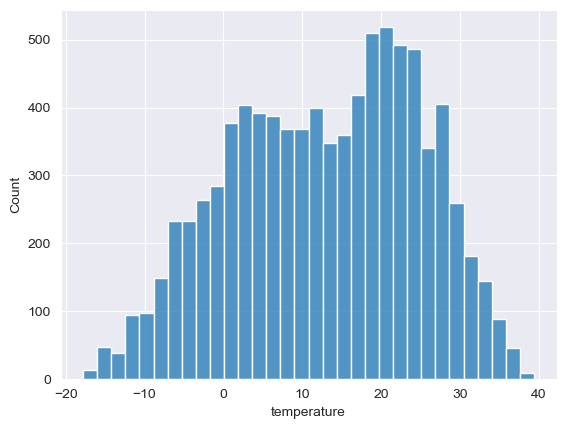

In [7]:
import seaborn as sns

sns.histplot(df['temperature'])

Izrišite graf raztrosa za vrednosti spremenljivk "temperature" in "rented_bike_count".

<AxesSubplot:xlabel='temperature', ylabel='rented_bike_count'>

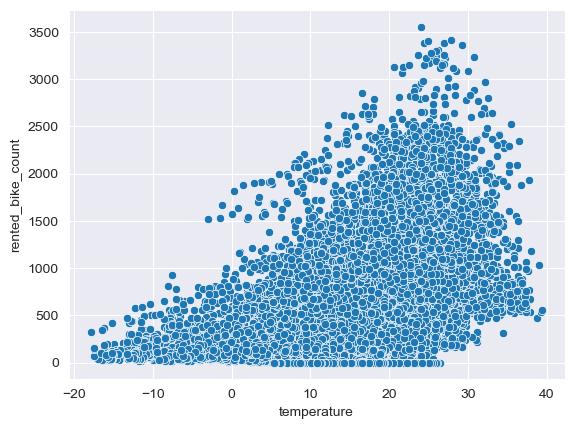

In [8]:
sns.scatterplot(x='temperature', y='rented_bike_count', data=df)

## Strojno učenje

Razdelitev podatkov na učno in testno množico (seveda ločeno na vhodne in izhodno spremenljivko - "rented_bike_count") tako, da bo testna množica zajemala 30% vseh podatkov pri čemer naj bo parameter random_state nastavljen na vrednost 1234.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

X = df.drop('rented_bike_count', axis=1)
y = df['rented_bike_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

models = [LinearRegression(), Ridge()]

for model in models:
    model.fit(X_train, y_train)

## Ovrednotenje napovednega modela

- Pridobivanje napovedane vrednosti z uporabo zgrajenega napovednega modela za vsak primerek iz množice testnih podatkov.
- Izračun sledečih metrik nad testnimi podatki:
    - povprečna absolutna napaka,
    - povprečna kvadratna napaka,
    - vrednost razložene variance.

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

mae_results = []
mse_results = []
ev_results = []

for model in models:
    y_pred = model.predict(X_test)

    model_name = type(model).__name__

    mae = mean_absolute_error(y_test, y_pred)
    mae_results.append({"name": model_name, "result": mae})

    mse = mean_squared_error(y_test, y_pred)
    mse_results.append({"name": model_name, "result": mse})

    ev = explained_variance_score(y_test, y_pred)
    ev_results.append({"name": model_name, "result": ev})

    print(model_name, 'MAE: ', mae)
    print(model_name, 'MSE: ', mse)
    print(model_name, 'EV: ', ev)

LinearRegression MAE:  330.1994015668592
LinearRegression MSE:  193318.5989751707
LinearRegression EV:  0.5541983328335609
Ridge MAE:  330.1140665525324
Ridge MSE:  193312.56201203543
Ridge EV:  0.5542125176088274


Implementirajte prikaz oz. primerjavo rezultatov obeh algoritmov v obliki grafov za MAE, MSE, EV

Text(0.5, 1.0, 'Mean Absolute Error')

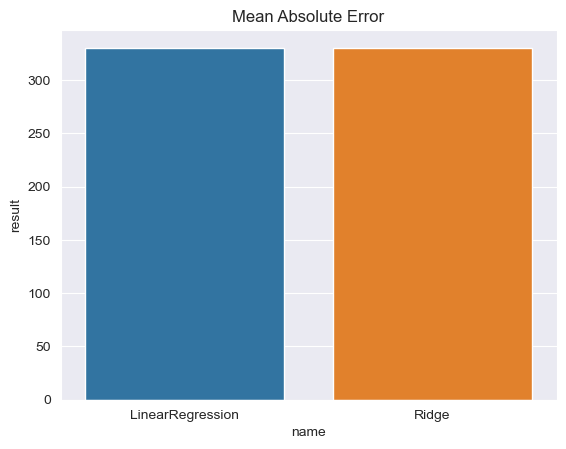

In [11]:
sns.barplot(x='name', y='result', data=pd.DataFrame(mae_results)).set_title('Mean Absolute Error')    

Text(0.5, 1.0, 'Mean Squared Error')

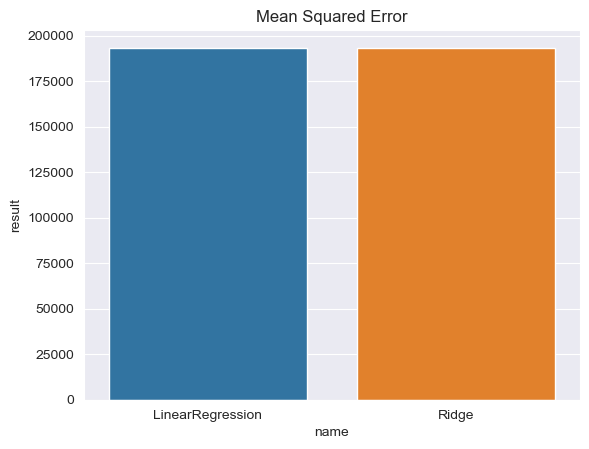

In [12]:
sns.barplot(x='name', y='result', data=pd.DataFrame(mse_results)).set_title('Mean Squared Error')

Text(0.5, 1.0, 'Explained Variance Score')

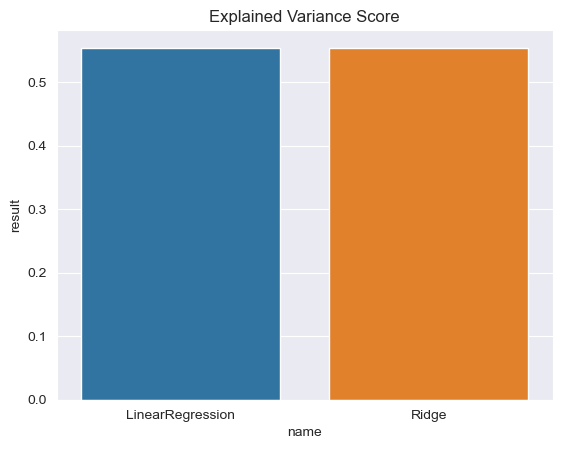

In [13]:
sns.barplot(x='name', y='result', data=pd.DataFrame(ev_results)).set_title('Explained Variance Score')